# **Problem Statement**

## **Business Context**

Workplace safety in hazardous environments like construction sites and industrial plants is crucial to prevent accidents and injuries. One of the most important safety measures is ensuring workers wear safety helmets, which protect against head injuries from falling objects and machinery. Non-compliance with helmet regulations increases the risk of serious injuries or fatalities, making effective monitoring essential, especially in large-scale operations where manual oversight is prone to errors and inefficiency.

To overcome these challenges, SafeGuard Corp plans to develop an automated image analysis system capable of detecting whether workers are wearing safety helmets. This system will improve safety enforcement, ensuring compliance and reducing the risk of head injuries. By automating helmet monitoring, SafeGuard aims to enhance efficiency, scalability, and accuracy, ultimately fostering a safer work environment while minimizing human error in safety oversight.

## **Objective**

As a data scientist at SafeGuard Corp, you are tasked with developing an image classification model that classifies images into one of two categories:
- **With Helmet:** Workers wearing safety helmets.
- **Without Helmet:** Workers not wearing safety helmets.

## **Data Description**

The dataset consists of **631 images**, equally divided into two categories:

- **With Helmet:** 311 images showing workers wearing helmets.
- **Without Helmet:** 320 images showing workers not wearing helmets.

**Dataset Characteristics:**
- **Variations in Conditions:** Images include diverse environments such as construction sites, factories, and industrial settings, with variations in lighting, angles, and worker postures to simulate real-world conditions.
- **Worker Activities:** Workers are depicted in different actions such as standing, using tools, or moving, ensuring robust model learning for various scenarios.

# **Installing and Importing the Necessary Libraries**

In [ ]:
# !pip install tensorflow[and-cuda] numpy==1.25.2 -q
!pip install numpy==1.25.2 pandas==2.0.3 seaborn==0.13.1 tensorflow==2.15.0 scikit-learn==1.2.2 matplotlib==3.7.1 -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 41.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 48.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.3/475.3 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 37.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 63.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 52.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 37.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 51.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 22.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 6.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently ta

**Note:**

- After running the above cell, kindly restart the notebook kernel (for Jupyter Notebook) or runtime (for Google Colab) and run all cells sequentially from the next cell.

- On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in this notebook.

In [ ]:
import os
import random
import numpy as np                                                                               # Importing numpy for Matrix Operations
import pandas as pd
import seaborn as sns
import matplotlib.image as mpimg                                                                              # Importing pandas to read CSV files
import matplotlib.pyplot as plt                                                                  # Importting matplotlib for Plotting and visualizing images
import math                                                                                      # Importing math module to perform mathematical operations
import cv2


# Tensorflow modules
import keras
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator                              # Importing the ImageDataGenerator for data augmentation
from tensorflow.keras.models import Sequential                                                   # Importing the sequential module to define a sequential model
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,BatchNormalization # Defining all the layers to build our CNN Model
from tensorflow.keras.optimizers import Adam,SGD                                                 # Importing the optimizers which can be used in our model
from sklearn import preprocessing                                                                # Importing the preprocessing module to preprocess the data
from sklearn.model_selection import train_test_split                                             # Importing train_test_split function to split the data into train and test
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Model
from keras.applications.vgg16 import VGG16

from tensorflow.keras.callbacks import ReduceLROnPlateau                                            # Importing confusion_matrix to plot the confusion matrix

# Display images using OpenCV
from google.colab.patches import cv2_imshow

#Imports functions for evaluating the performance of machine learning models
from sklearn.metrics import confusion_matrix, f1_score,accuracy_score, recall_score, precision_score, classification_report
from sklearn.metrics import mean_squared_error as mse                                                 # Importing cv2_imshow from google.patches to display images

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')


In [ ]:
# Set the seed using keras.utils.set_random_seed. This will set:
# 1) `numpy` seed
# 2) backend random seed
# 3) `python` random seed
tf.keras.utils.set_random_seed(812)

# If using TensorFlow, this will make GPU ops as deterministic as possible,
# but it will affect the overall performance, so be mindful of that.
tf.config.experimental.enable_op_determinism()

# **Data Overview**


##Loading the data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load the image file of the dataset
images = np.load('/content/drive/My Drive/Python Course/images_proj.npy')
# Load the labels file of the dataset
labels = pd.read_csv('/content/drive/My Drive/Python Course/Labels_proj.csv')


# **Data Overview**

In [ ]:

# Assuming the label column is named 'Label', count unique values
num_classes = labels['Label'].nunique()

print("Number of classes:", num_classes)

Number of classes: 2


Let's print the shape of the images and labels

In [ ]:
print(images.shape)
print(labels.shape)

(631, 200, 200, 3)
(631, 1)


There are 631 RGB images of shape 200 x 200 X 3, each image having 3 channels.

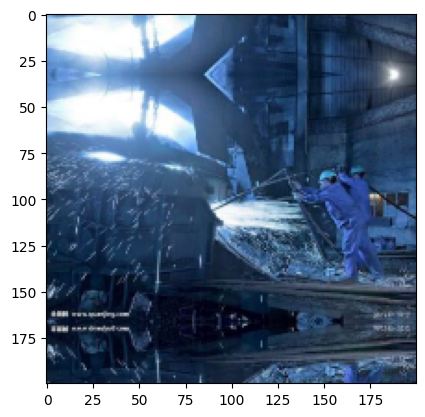

In [ ]:
plt.imshow(images[5])

# **Exploratory Data Analysis**

###Plot random images from each of the classes and print their corresponding labels.

In [ ]:
# Converting the images from BGR to RGB using cvtColor function of OpenCV
for i in range(len(images)):
  images[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)

In [ ]:
keys=dict(labels['Label'])


In [ ]:
def plot_images(images,labels):
  num_classes=2                                                                 # Number of Classes
  categories=np.unique(labels)
  keys=dict(labels['Label'])                                                      # Obtaing the unique classes from y_train
  rows = 3                                                                        # Defining number of rows=3
  cols = 4                                                                        # Defining number of columns=4
  fig = plt.figure(figsize=(10, 8))                                               # Defining the figure size to 10x8
  for i in range(cols):
      for j in range(rows):
          random_index = np.random.randint(0, len(labels))                        # Generating random indices from the data and plotting the images
          ax = fig.add_subplot(rows, cols, i * rows + j + 1)                      # Adding subplots with 3 rows and 4 columns
          ax.imshow(images[random_index, :])                                      # Plotting the image
          ax.set_title(keys[random_index])
  plt.show()

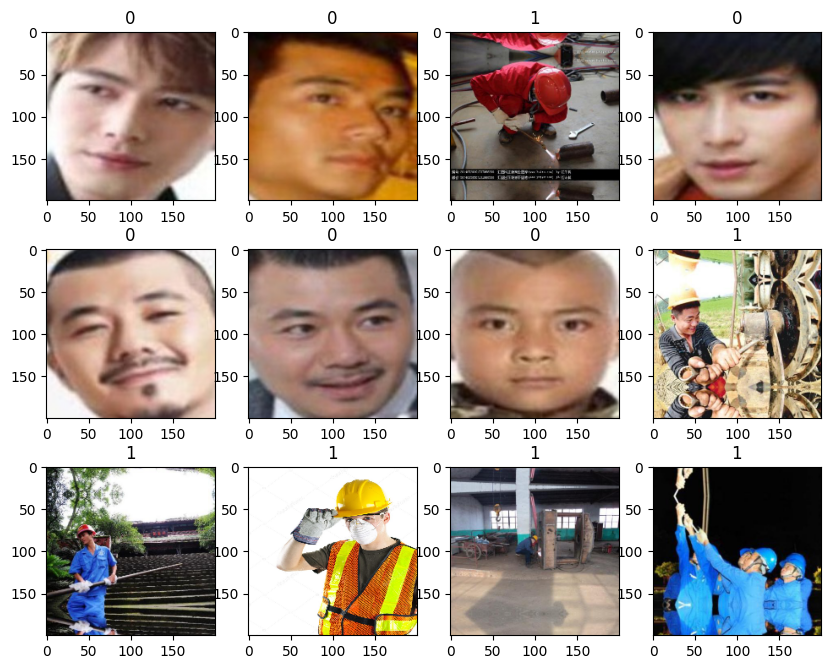

In [ ]:
plot_images(images,labels)

## Checking for class imbalance


In [ ]:
print(labels['Label'].value_counts())
print("Number of unique labels:", labels['Label'].nunique())
print(labels['Label'].unique())

Label
0    320
1    311
Name: count, dtype: int64
Number of unique labels: 2
[1 0]


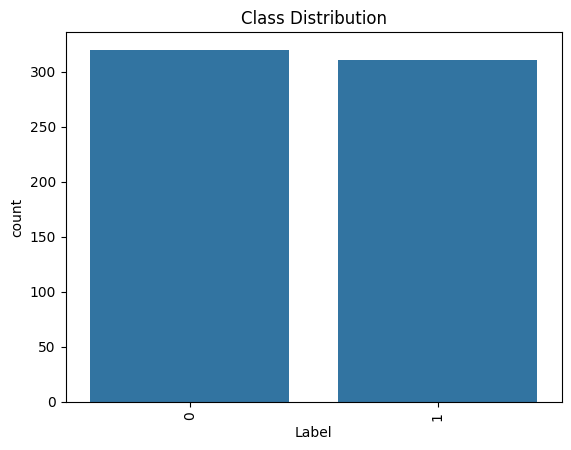

In [ ]:
sns.countplot(x=labels['Label'])
plt.xticks(rotation='vertical')
plt.title("Class Distribution")
plt.show()

**Observations from the Plot:**

**Balanced Dataset:**

•	Class 0 has slightly more samples than Class 1, but the difference is very small.

•	This balance is important — it helps prevent model bias toward one class.

**Good Dataset Quality:**

•	A balanced class distribution generally means better training performance, and model accuracy will be more reliable across both classes.


# **Data Preprocessing**

## Resizing images

As the size of the images is large, it may be computationally expensive to train on these larger images; therefore, it is preferable to reduce the image size from 200 to 100.

In [ ]:
images_decreased = []
height = 100
width = 100
dimensions = (width, height)
for i in range(len(images)):
  images_decreased.append( cv2.resize(images[i], dimensions, interpolation=cv2.INTER_LINEAR))

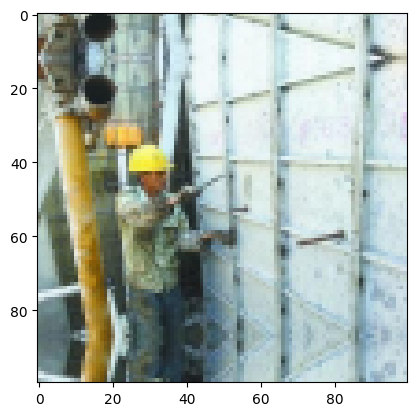

In [ ]:
plt.imshow(images_decreased[3]);

## Converting images to grayscale

We define a function, grid_plot, to display two images side by side: the original image and its processed version. It helps visually compare the effects of image processing techniques.

Inputs:

•	img1: The original image.

•	img2: The processed image

•	gray (optional, default: False): If True, displays the processed image in grayscale.

Output:

•	The original image displayed on the left and the processed image on the right.


In [ ]:
# Function to plot the original and processed images side by side
def grid_plot(img1,img2,gray=False):
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    axes[0].imshow(img1)
    axes[0].set_title('Original Image')
    axes[0].axis('off')

    if gray:
      axes[1].imshow(img2,cmap='gray')
    else:
      axes[1].imshow(img2)
    axes[1].set_title('Processed Image')
    axes[1].axis('off')

    plt.show()

In [ ]:
gray_images = []
for i in range(len(images)):
  gray_images.append(cv2.cvtColor(images[i], cv2.COLOR_RGB2GRAY))

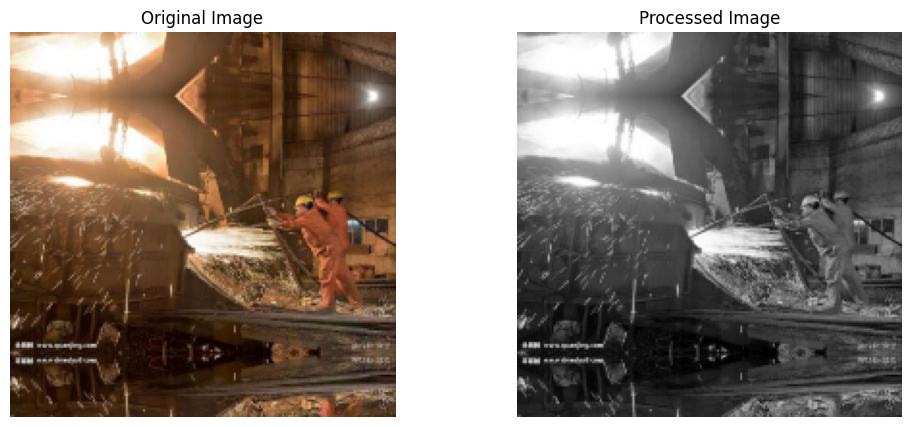

In [ ]:
# choosing an image
n = 5
# plotting the original and preprocessed image
grid_plot(images[n],gray_images[n],gray=True)

•	As expected, the RGB component is removed.

•	This feature will be highly beneficial as it also reduces computational requirements.


### Splitting the dataset



•	As we have less images in our dataset, we will only use 10% of our data for testing, 10% of our data for validation and 80% of our data for training.

•	We are using the train_test_split() function from scikit-learn. Here, we split the dataset into three parts, train,test and validation.


In [ ]:
# Convert images_decreased to a NumPy array before splitting
images_decreased_np = np.array(images_decreased)

X_train, X_temp, y_train, y_temp = train_test_split(images_decreased_np, labels, test_size=0.2, random_state=42,stratify=labels)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42,stratify=y_temp)

In [ ]:
print(X_train.shape,y_train.shape)
print(X_val.shape,y_val.shape)
print(X_test.shape,y_test.shape)

(504, 100, 100, 3) (504, 1)
(63, 100, 100, 3) (63, 1)
(64, 100, 100, 3) (64, 1)


## Encoding the target labels

Convert labels from names to one hot vectors

In [ ]:
# Convert labels from names to one hot vectors.
# Labelbinarizer works similar to onehotencoder

from sklearn.preprocessing import LabelBinarizer
enc = LabelBinarizer()
y_train_encoded = enc.fit_transform(y_train)
y_val_encoded=enc.transform(y_val)
y_test_encoded=enc.transform(y_test)


In [ ]:
print(y_train_encoded[0])
print(y_val_encoded[0])
print(y_test_encoded[0])

[1]
[0]
[0]


### Data Normalization

Since the image pixel values range from 0-255, our method of normalization here will be scaling - we shall divide all the pixel values by 255 to standardize the images to have values between 0-1.

In [ ]:
# Normalizing the image pixels
X_train_normalized = X_train.astype('float32')/255.0
X_val_normalized = X_val.astype('float32')/255.0
X_test_normalized = X_test.astype('float32')/255.0

# **Model Building**

##Model Evaluation Criterion

## Utility Functions

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels

def model_performance_classification(model, predictors, target):
    """
    Function to compute classification metrics for a binary classification problem (Helmet vs Without Helmet).

    Parameters:
    - model: Trained classification model
    - predictors: Input features (X)
    - target: True labels (y), can be one-hot encoded or plain 0/1 labels

    Returns:
    - df_perf: DataFrame with Accuracy, Recall, Precision, F1 Score
    """

    # Get predictions from the model
    pred_prob = model.predict(predictors)

    # Convert predictions to class labels
    if pred_prob.shape[-1] == 1:
        pred = (pred_prob > 0.5).astype("int32").flatten()
    else:
        pred = np.argmax(pred_prob, axis=1)

    # Convert target to class labels if one-hot encoded
    if len(target.shape) > 1 and target.shape[-1] > 1:
        target = np.argmax(target, axis=1)
    else:
        target = target.flatten()

    # Compute metrics
    acc = accuracy_score(target, pred)
    recall = recall_score(target, pred)        # binary default is `pos_label=1`
    precision = precision_score(target, pred)
    f1 = f1_score(target, pred)

    # Create DataFrame with performance metrics
    df_perf = pd.DataFrame({
        "Accuracy": [acc],
        "Recall": [recall],
        "Precision": [precision],
        "F1 Score": [f1],
    })

    return df_perf

In [ ]:

def plot_confusion_matrix(model, predictors, target):
    """
    Function to plot the confusion matrix for a binary classification problem (e.g., Helmet vs. Without Helmet).

    Parameters:
    - model: Trained classification model.
    - predictors: Independent variables (input data).
    - target: Dependent variable (true labels). This can be either a vector of 0/1 labels or one-hot encoded.
    """
    # Get the model predictions
    pred_prob = model.predict(predictors)

    # Convert predictions to class labels:
    # If model output is a single probability (shape: [n_samples, 1] or [n_samples]), threshold at 0.5.
    if pred_prob.shape[-1] == 1:
        pred = (pred_prob > 0.5).astype("int32").flatten()
    else:
        # If output is two probabilities per sample, choose the class with the higher probability.
        pred = pred_prob.argmax(axis=1)

    # Convert target to a vector of labels if one-hot encoded
    if len(target.shape) > 1 and target.shape[-1] > 1:
        target_labels = target.argmax(axis=1)
    else:
        target_labels = target.flatten()

    # Compute the confusion matrix.
    cm = tf.math.confusion_matrix(target_labels, pred)

    # Define labels (adjust the order to match your encoding)
    class_names = ['Without Helmet', 'With Helmet']

    # Plot the confusion matrix as a heatmap.
    plt.figure(figsize=(10, 8))
    sns.heatmap(
        cm,
        annot=True,
        fmt="d",
        linewidths=.4,
        square=True,
        xticklabels=class_names,
        yticklabels=class_names,
        cmap='Blues'
    )
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

In [ ]:
def plot_confusion_matrix_CNN(y_pred, y_test):
    # If model.predict() gives probabilities, convert to 0 or 1
    y_pred_binary = (y_pred > 0.5).astype(int).flatten()
    y_test_binary = y_test.values.flatten()  # Access the NumPy array before flattening

    # Compute the confusion matrix.
    conf_matrix = tf.math.confusion_matrix(y_test_binary, y_pred_binary)

    # Define labels (adjust the order to match your encoding)
    class_names = ['Without Helmet', 'With Helmet']

        # Plot the confusion matrix as a heatmap.
    plt.figure(figsize=(10, 8))
    sns.heatmap(
            conf_matrix,
            annot=True,
            fmt="d",
            linewidths=.4,
            square=True,
            xticklabels=class_names,
            yticklabels=class_names,
            cmap='Blues'
        )
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

##Model 1: Simple Convolutional Neural Network (CNN)

Let's create a CNN model sequentially, where we will be adding the layers one after another.

First, we need to clear the previous model's history from the session even if a single model can run multiple times on the same data.

In Keras, we need a special command to clear the model's history, otherwise the previous model history remains in the backend.

Also, let's fix the seed again after clearing the backend.

Let's set the seed for random number generators in Numpy, the Random library in Python, and in TensorFlow to be able to reproduce the same results every time we run the code.

In [ ]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

In [ ]:
# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

Now, let's build a CNN Model with the following 2 main parts -

1.	The Feature Extraction layers which are comprised of convolutional and pooling layers.

2.	The Fully Connected classification layers for prediction.


In [ ]:
# Intializing a sequential model
model1 = Sequential()

# Adding first conv layer with 64 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension of images
model1.add(Conv2D(128, (3, 3), activation='relu', padding="same", input_shape=(100, 100, 3)))

# Adding max pooling to reduce the size of output of first conv layer
model1.add(MaxPooling2D((2, 2), padding = 'same'))

# Creating two similar convolution and max-pooling layers
model1.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
model1.add(MaxPooling2D((2, 2), padding = 'same'))

model1.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model1.add(MaxPooling2D((2, 2), padding = 'same'))

# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model1.add(Flatten())

# Adding a fully connected dense layer with 100 neurons
model1.add(Dense(16, activation='relu'))
model1.add(Dropout(0.3))
# Adding the output layer with 12 neurons and activation functions as softmax since this is a multi-class classification problem
model1.add(Dense(1, activation='sigmoid'))

opt=Adam()
# Compile model
model1.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2  (None, 50, 50, 128)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 25, 25, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 25, 25, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0

**Fitting the model on the train data**

In [ ]:
history_1 = model1.fit(
            X_train_normalized, y_train_encoded,
            epochs=15,
            validation_data=(X_val_normalized,y_val_encoded),
            batch_size=32,
            verbose=2
)

Epoch 1/15
16/16 - 21s - loss: 0.5356 - accuracy: 0.6944 - val_loss: 0.1555 - val_accuracy: 0.9841 - 21s/epoch - 1s/step
Epoch 2/15
16/16 - 23s - loss: 0.1884 - accuracy: 0.9444 - val_loss: 0.2109 - val_accuracy: 0.9048 - 23s/epoch - 1s/step
Epoch 3/15
16/16 - 20s - loss: 0.1789 - accuracy: 0.9425 - val_loss: 0.0766 - val_accuracy: 0.9841 - 20s/epoch - 1s/step
Epoch 4/15
16/16 - 20s - loss: 0.0990 - accuracy: 0.9742 - val_loss: 0.0418 - val_accuracy: 0.9683 - 20s/epoch - 1s/step
Epoch 5/15
16/16 - 19s - loss: 0.0576 - accuracy: 0.9901 - val_loss: 0.0127 - val_accuracy: 1.0000 - 19s/epoch - 1s/step
Epoch 6/15
16/16 - 19s - loss: 0.0394 - accuracy: 0.9940 - val_loss: 0.0205 - val_accuracy: 0.9841 - 19s/epoch - 1s/step
Epoch 7/15
16/16 - 20s - loss: 0.1259 - accuracy: 0.9603 - val_loss: 0.0944 - val_accuracy: 0.9683 - 20s/epoch - 1s/step
Epoch 8/15
16/16 - 19s - loss: 0.0883 - accuracy: 0.9802 - val_loss: 0.0558 - val_accuracy: 0.9841 - 19s/epoch - 1s/step
Epoch 9/15
16/16 - 18s - loss: 0

**Model Evaluation**

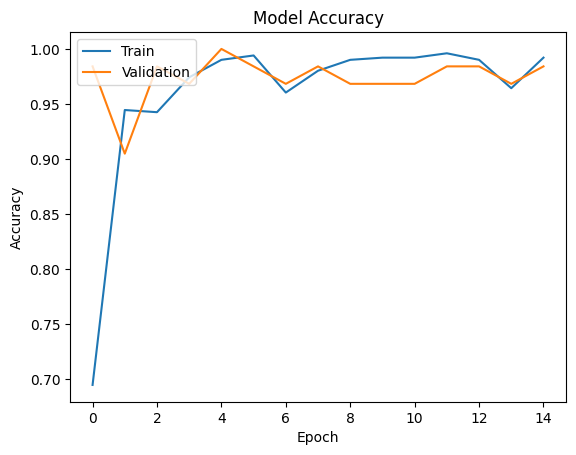

In [ ]:
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**Observations:**

**Rapid Training Improvement:**

•	Training accuracy increases very quickly in the first few epochs (from ~0.72 to ~0.95).

•	After that, it gradually approaches 1.00, indicating that the model is learning the training data extremely well.

**High Validation Accuracy:**

•	Validation accuracy stabilizes around 0.97 after a few epochs.

•	This is a very good score, showing that the model generalizes well to unseen data.

**No Overfitting Signs (Major):**

•	The training accuracy is slightly higher than validation accuracy, which is expected.

•	The gap is small (~2–3%), which means overfitting is minimal or well-controlled.

•	The curves are smooth without large fluctuations, indicating stable training.

**Model Convergence:**

•	By around epoch 5, both training and validation accuracies have mostly plateaued.

•	Further training doesn't significantly improve performance — you might consider early stopping.


**Evaluating the model on test data**

In [ ]:
accuracy = model1.evaluate(X_test_normalized, y_test_encoded, verbose=2)

2/2 - 1s - loss: 0.0105 - accuracy: 1.0000 - 896ms/epoch - 448ms/step


**Plotting the Confusion Matrix**

•	The Confusion matrix is also defined as an inbuilt function in the TensorFlow module, so we can use that for evaluating the classification model.

•	The Confusion matrix expects categorical data as input. However, y_test_encoded is an encoded value, whereas y_pred has probabilities. So,we must retrieve the categorical values from the encoded values.

•	We will use the argmax() function to obtain the maximum value over each category on both y_test_encoded and y_pred and obtain their respective classes.


In [ ]:
# Here we would get the output as probablities for each category
y_pred=model1.predict(X_test_normalized)

2/2 [==============================] - 1s 533ms/step


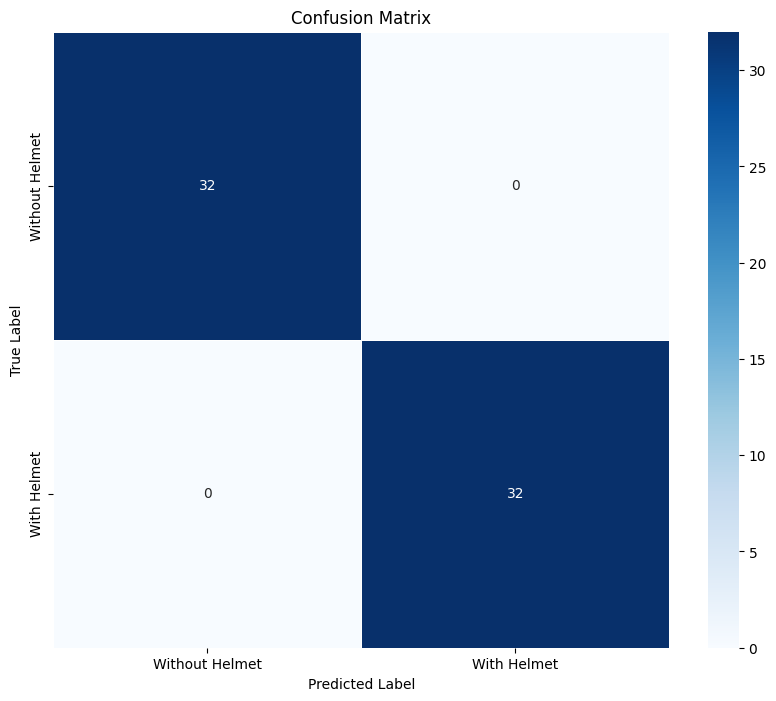

In [ ]:
plot_confusion_matrix_CNN(y_pred,y_test)

**Observation:**

**Perfect Classification:**

•	All 32 images labeled "Without Helmet" were correctly predicted.

•	All 32 images labeled "With Helmet" were also correctly predicted.

**No Misclassifications:**

•	False Positives = 0
•	False Negatives = 0

Accuracy = 100%


In [ ]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

In [ ]:
from sklearn import metrics
#Accuracy as per the classification report
cr=metrics.classification_report(y_test_arg,y_pred_arg)
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        64

    accuracy                           1.00        64
   macro avg       1.00      1.00      1.00        64
weighted avg       1.00      1.00      1.00        64



**Deleting the model and history variable to use the RAM efficiently**

In [ ]:
del model1
del history_1

**Reducing the Learning Rate:**

ReduceLRonPlateau() is a function that will be used to decrease the learning rate by some factor, if the loss is not decreasing for some time. This may start decreasing the loss at a smaller learning rate. There is a possibility that the loss may still not decrease. This may lead to executing the learning rate reduction again in an attempt to achieve a lower loss.

In [ ]:
learning_rate_reduction = ReduceLROnPlateau(
    monitor='val_accuracy',
    patience=3,
    verbose=1,
    factor=0.5,
    min_lr=0.00001
)

### **Data Augmentation**

Remember, data augmentation should not be used in the validation/test data set.

In [ ]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [ ]:
train_datagen = ImageDataGenerator(
                              rotation_range=20,
                              fill_mode='nearest'
                              )


In [ ]:
# Intializing a sequential model
model2 = Sequential()

# Adding first conv layer with 64 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension images
model2.add(Conv2D(128, (3, 3), activation='relu', padding="same", input_shape=(100, 100, 3)))

# Adding max pooling to reduce the size of output of first conv layer
model2.add(MaxPooling2D((2, 2), padding = 'same'))
# model.add(BatchNormalization())
model2.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model2.add(MaxPooling2D((2, 2), padding = 'same'))
model2.add(BatchNormalization())
# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model2.add(Flatten())

# Adding a fully connected dense layer with 100 neurons
model2.add(Dense(16, activation='relu'))
model2.add(Dropout(0.3))
# Adding the output layer with 12 neurons and activation functions as softmax since this is a multi-class classification problem
model2.add(Dense(1, activation='sigmoid'))

# Using SGD Optimizer
# opt = SGD(learning_rate=0.01, momentum=0.9)
opt=Adam()
# Compile model
model2.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2  (None, 50, 50, 128)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 32)        36896     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 25, 25, 32)        0         
 g2D)                                                            
                                                                 
 batch_normalization (Batch  (None, 25, 25, 32)        128       
 Normalization)                                                  
                                                        

**Fitting the model on the train data**

In [ ]:
# Epochs
epochs = 15
# Batch size
batch_size = 32

history = model2.fit(train_datagen.flow(X_train_normalized,y_train_encoded,
                                       batch_size=batch_size,
                                       shuffle=False),
                                       epochs=epochs,
                                       steps_per_epoch=X_train_normalized.shape[0] // batch_size,
                                       validation_data=(X_val_normalized,y_val_encoded),
                                       verbose=1,callbacks=[learning_rate_reduction])

Epoch 1/15
15/15 [==============================] - 17s 1s/step - loss: 0.2543 - accuracy: 0.8962 - val_loss: 0.8629 - val_accuracy: 0.4921 - lr: 0.0010
Epoch 2/15
15/15 [==============================] - 15s 1s/step - loss: 0.1288 - accuracy: 0.9661 - val_loss: 0.9633 - val_accuracy: 0.4921 - lr: 0.0010
Epoch 3/15
15/15 [==============================] - 16s 1s/step - loss: 0.0614 - accuracy: 0.9682 - val_loss: 0.4567 - val_accuracy: 0.6032 - lr: 0.0010
Epoch 4/15
15/15 [==============================] - 15s 1s/step - loss: 0.0629 - accuracy: 0.9746 - val_loss: 0.4151 - val_accuracy: 0.8095 - lr: 0.0010
Epoch 5/15
15/15 [==============================] - 17s 1s/step - loss: 0.1409 - accuracy: 0.9449 - val_loss: 0.1569 - val_accuracy: 0.9683 - lr: 0.0010
Epoch 6/15
15/15 [==============================] - 16s 1s/step - loss: 0.1303 - accuracy: 0.9619 - val_loss: 0.5422 - val_accuracy: 0.6508 - lr: 0.0010
Epoch 7/15
15/15 [==============================] - 17s 1s/step - loss: 0.0564 - a

**Model Evaluation**

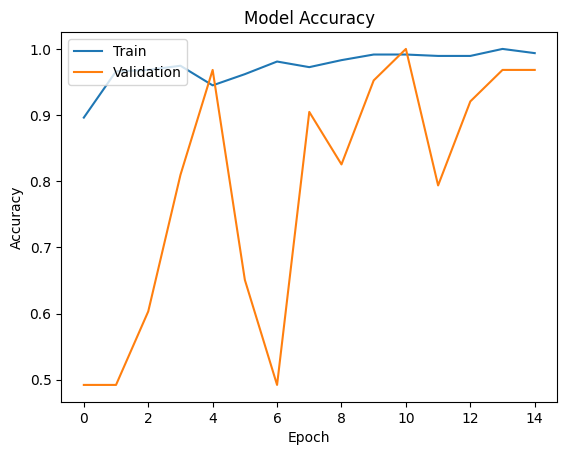

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
modelCNN_train_perf = model_performance_classification(model2, X_train_normalized,y_train_encoded)

print("Train performance metrics")
print(modelCNN_train_perf)

16/16 [==============================] - 5s 318ms/step
Train performance metrics
   Accuracy  Recall  Precision  F1 Score
0  0.968254     1.0   0.939394   0.96875


In [ ]:
modelCNN_valid_perf = model_performance_classification(model2, X_val_normalized,y_val_encoded)

print("Validation performance metrics")
print(modelCNN_valid_perf)

2/2 [==============================] - 0s 244ms/step
Validation performance metrics
   Accuracy  Recall  Precision  F1 Score
0  0.968254     1.0   0.939394   0.96875


**Evaluate the model on test data**

In [ ]:
accuracy = model2.evaluate(X_test_normalized, y_test_encoded, verbose=2)

2/2 - 0s - loss: 0.0542 - accuracy: 1.0000 - 450ms/epoch - 225ms/step


•	We can observe that our accuracy has decreased compared to our previous model.

•	The model is giving a generalized performance.


**Plotting the Confusion Matrix**

In [ ]:
# Here we would get the output as probablities for each category
y_pred=model2.predict(X_test_normalized)

2/2 [==============================] - 0s 227ms/step


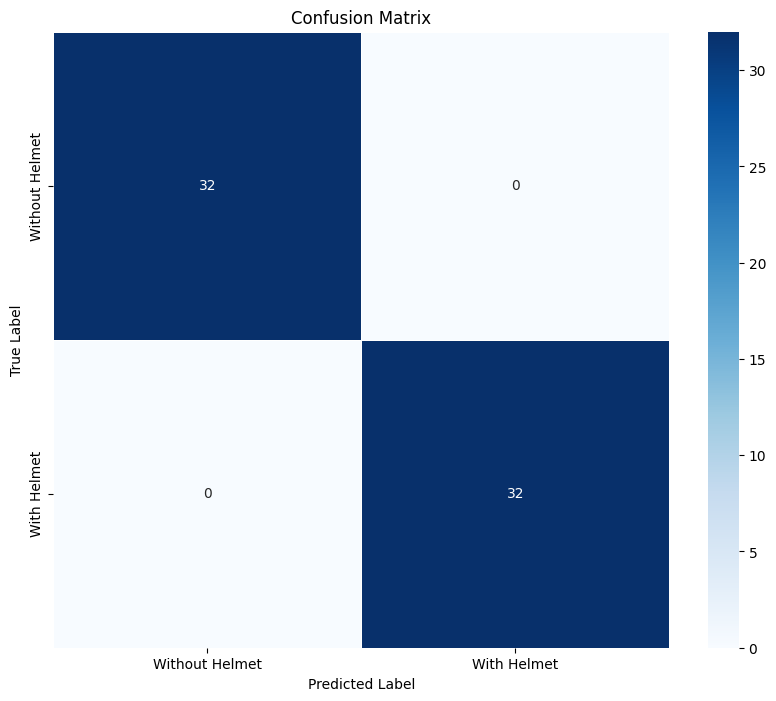

In [ ]:
plot_confusion_matrix_CNN(y_pred,y_test)

**Observation:**

**Perfect Classification:**

•	All 32 images labeled "Without Helmet" were correctly predicted.

•	All 32 images labeled "With Helmet" were also correctly predicted.

**No Misclassifications:**

•	False Positives = 0
•	False Negatives = 0

Accuracy = 100%

**Plotting Classification Report**

In [ ]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

In [ ]:
#Accuracy as per the classification report
cr=metrics.classification_report(y_test_arg,y_pred_arg)
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        64

    accuracy                           1.00        64
   macro avg       1.00      1.00      1.00        64
weighted avg       1.00      1.00      1.00        64



### Vizualizing the predictions

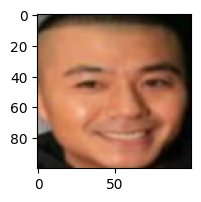

1/1 [==============================] - 0s 27ms/step
Predicted Label [0]
True Label 0


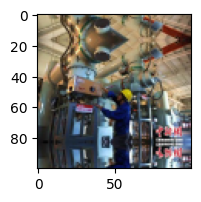

1/1 [==============================] - 0s 27ms/step
Predicted Label [1]
True Label 1


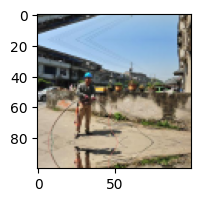

1/1 [==============================] - 0s 47ms/step
Predicted Label [1]
True Label 1


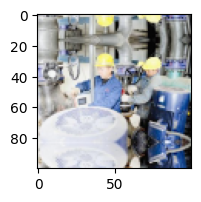

1/1 [==============================] - 0s 50ms/step
Predicted Label [1]
True Label 1


In [ ]:
# Visualizing the predicted and correct label of images from test data
plt.figure(figsize=(2,2))
plt.imshow(X_test[2])
plt.show()
print('Predicted Label', enc.inverse_transform(model2.predict((X_test_normalized[2].reshape(1,100,100,3)))))   # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[2])                                               # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[33])
plt.show()
print('Predicted Label', enc.inverse_transform(model2.predict((X_test_normalized[33].reshape(1,100,100,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[33])                                              # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[59],)
plt.show()
print('Predicted Label', enc.inverse_transform(model2.predict((X_test_normalized[59].reshape(1,100,100,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[59])                                              # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[36])
plt.show()
print('Predicted Label', enc.inverse_transform(model2.predict((X_test_normalized[36].reshape(1,100,100,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[36])                                              # using inverse_transform() to get the output label from the output vector

## Model 2: (VGG-16 (Base))

•	We will be loading a pre-built architecture - VGG16, which was trained on the ImageNet dataset and is the runner-up in the ImageNet competition in 2014.

•	For training VGG16, we will directly use the convolutional and pooling layers and freeze their weights i.e. no training will be done on them. For classification, we will add a Flatten and a single dense layer.


In [ ]:
vgg_model = VGG16(weights='imagenet',include_top=False,input_shape=(100,100,3))
vgg_model.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 100, 100, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 100, 100, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 50, 50, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 50, 50, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 50, 50, 128)       147584    
                                                              

In [ ]:
# Making all the layers of the VGG model non-trainable. i.e. freezing them
for layer in vgg_model.layers:
    layer.trainable = False

In [ ]:
model_1 = Sequential()

# Adding the convolutional part of the VGG16 model from above
model_1.add(vgg_model)

# Flattening the output of the VGG16 model because it is from a convolutional layer
model_1.add(Flatten())

# Adding a dense output layer
model_1.add(Dense(1, activation='sigmoid'))

In [ ]:
opt=Adam()
# Compile model
model_1.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Generating the summary of the model
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 3, 3, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 4608)              0         
                                                                 
 dense_2 (Dense)             (None, 1)                 4609      
                                                                 
Total params: 14719297 (56.15 MB)
Trainable params: 4609 (18.00 KB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [ ]:
train_datagen = ImageDataGenerator()


In [ ]:
# Epochs
epochs = 15
# Batch size
batch_size = 32

history_vgg16 = model_1.fit(train_datagen.flow(X_train_normalized,y_train_encoded,
                                       batch_size=batch_size,
                                       seed=42,
                                       shuffle=False),
                    epochs=epochs,
                    steps_per_epoch=X_train_normalized.shape[0] // batch_size,
                    validation_data=(X_val_normalized,y_val_encoded),
                    verbose=1)

Epoch 1/15
15/15 [==============================] - 40s 3s/step - loss: 0.3734 - accuracy: 0.8665 - val_loss: 0.1385 - val_accuracy: 0.9841
Epoch 2/15
15/15 [==============================] - 34s 2s/step - loss: 0.0823 - accuracy: 0.9979 - val_loss: 0.0610 - val_accuracy: 1.0000
Epoch 3/15
15/15 [==============================] - 35s 2s/step - loss: 0.0400 - accuracy: 1.0000 - val_loss: 0.0397 - val_accuracy: 1.0000
Epoch 4/15
15/15 [==============================] - 31s 2s/step - loss: 0.0271 - accuracy: 1.0000 - val_loss: 0.0320 - val_accuracy: 1.0000
Epoch 5/15
15/15 [==============================] - 34s 2s/step - loss: 0.0220 - accuracy: 1.0000 - val_loss: 0.0282 - val_accuracy: 1.0000
Epoch 6/15
15/15 [==============================] - 31s 2s/step - loss: 0.0185 - accuracy: 1.0000 - val_loss: 0.0243 - val_accuracy: 1.0000
Epoch 7/15
15/15 [==============================] - 32s 2s/step - loss: 0.0155 - accuracy: 1.0000 - val_loss: 0.0220 - val_accuracy: 1.0000
Epoch 8/15
15/15 [==

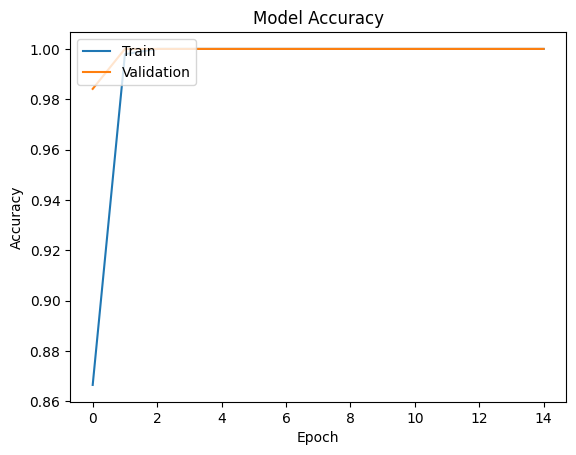

In [ ]:
plt.plot(history_vgg16.history['accuracy'])
plt.plot(history_vgg16.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**Observations:**

**1.	Very High Accuracy:**

•	Training starts around 85%, and very quickly (by epoch 2) reaches nearly 100%.

•	Validation accuracy also hits 100% very early and stays constant throughout training.

**2.	Training = Validation:**

•	Both training and validation accuracies are overlapping at or near 1.00, showing perfect or near-perfect classification.



In [ ]:
model_1_train_perf = model_performance_classification(model_1, X_train_normalized, y_train_encoded)

print("Train performance metrics")
print(model_1_train_perf)

16/16 [==============================] - 31s 2s/step
Train performance metrics
   Accuracy  Recall  Precision  F1 Score
0       1.0     1.0        1.0       1.0


16/16 [==============================] - 31s 2s/step


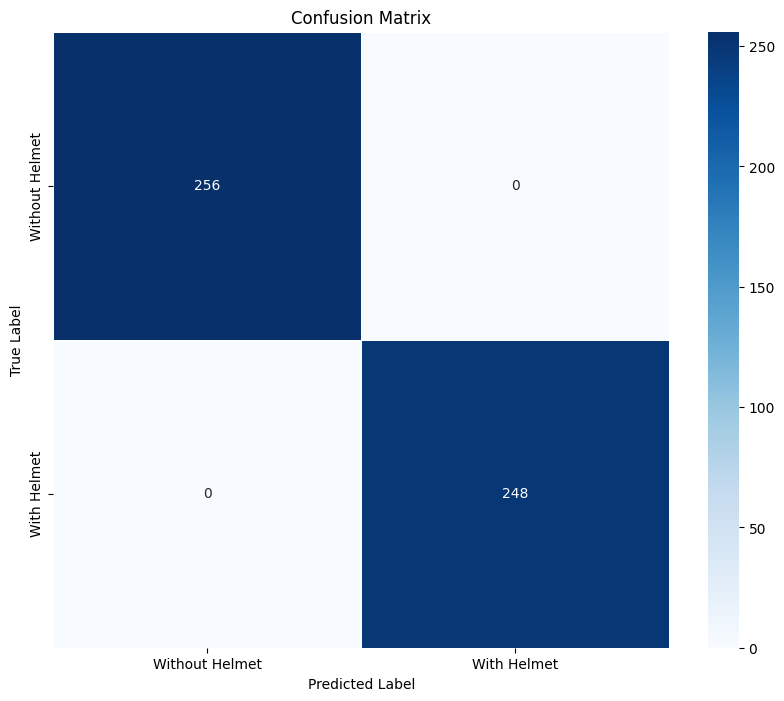

In [ ]:
plot_confusion_matrix(model_1,X_train_normalized, y_train_encoded)

**Observation:**

The confusion matrix shows perfect classification — the model correctly predicted all 256 "Without Helmet" and 248 "With Helmet" instances with zero misclassifications. This indicates 100% accuracy, suggesting the model performs exceptionally well on the given dataset.

In [ ]:

model_1_valid_perf = model_performance_classification(model_1, X_val_normalized, y_val_encoded)

print("Validation performance metrics")
print(model_1_valid_perf)

2/2 [==============================] - 3s 2s/step
Validation performance metrics
   Accuracy  Recall  Precision  F1 Score
0       1.0     1.0        1.0       1.0


2/2 [==============================] - 3s 2s/step


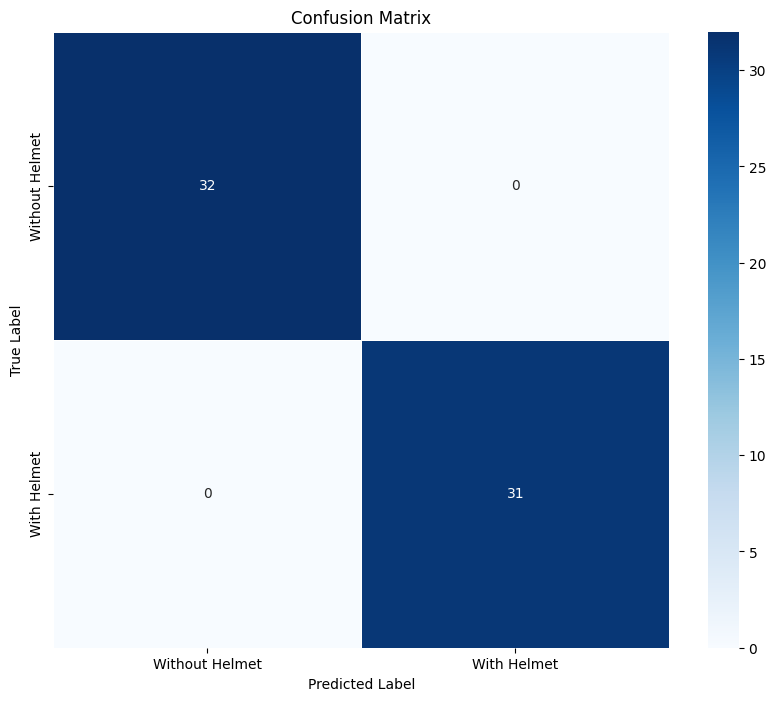

In [ ]:
plot_confusion_matrix(model_1,X_val_normalized, y_val_encoded)

**Observation:**

The confusion matrix indicates perfect classification — all 32 "Without Helmet" and all 31 "With Helmet" instances were correctly predicted by the model, with no false positives or false negatives. This reflects 100% accuracy on the test dataset.

### Visualizing the prediction:

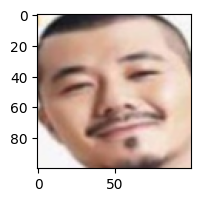

1/1 [==============================] - 0s 86ms/step
Predicted Label [0]
True Label 0


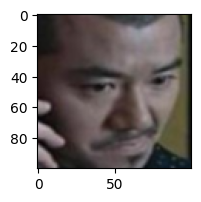

1/1 [==============================] - 0s 90ms/step
Predicted Label [0]
True Label 1


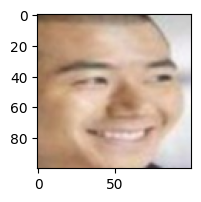

1/1 [==============================] - 0s 92ms/step
Predicted Label [0]
True Label 1


In [ ]:
# Visualizing the predicted and correct label of images from test data
plt.figure(figsize=(2,2))
plt.imshow(X_val[2])
plt.show()
print('Predicted Label', enc.inverse_transform(model_1.predict((X_val_normalized[2].reshape(1,100,100,3)))))   # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[2])                                               # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_val[33])
plt.show()
print('Predicted Label', enc.inverse_transform(model_1.predict((X_val_normalized[33].reshape(1,100,100,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[33])                                              # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_val[36])
plt.show()
print('Predicted Label', enc.inverse_transform(model_1.predict((X_val_normalized[36].reshape(1,100,100,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[36])

## Model 3: (VGG-16 (Base + FFNN))

We will directly use the convolutional and pooling layers and freeze their weights i.e. no training will be done on them. For classification, we will add a Flatten layer and a Feed Forward Neural Network.

In [ ]:
model_2 = Sequential()

# Adding the convolutional part of the VGG16 model from above
model_2.add(vgg_model)

# Flattening the output of the VGG16 model because it is from a convolutional layer
model_2.add(Flatten())

#Adding the Feed Forward neural network
model_2.add(Dense(256,activation='relu'))
model_2.add(Dropout(rate=0.4))
model_2.add(Dense(32,activation='relu'))

# Adding a dense output layer
model_2.add(Dense(1, activation='sigmoid'))

In [ ]:
opt = Adam()

In [ ]:
# Compile model
model_2.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Generating the summary of the model
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 3, 3, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 4608)              0         
                                                                 
 dense_3 (Dense)             (None, 256)               1179904   
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_4 (Dense)             (None, 32)                8224      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 15902849 (60.66 MB)
Trainable params: 11

In [ ]:
history_vgg16 = model_2.fit(train_datagen.flow(X_train_normalized,y_train_encoded,
                                       batch_size=batch_size,
                                       seed=42,
                                       shuffle=False),
                    epochs=epochs,
                    steps_per_epoch=X_train_normalized.shape[0] // batch_size,
                    validation_data=(X_val_normalized,y_val_encoded),
                    verbose=1)

Epoch 1/15
15/15 [==============================] - 35s 2s/step - loss: 0.1759 - accuracy: 0.9068 - val_loss: 0.0172 - val_accuracy: 0.9841
Epoch 2/15
15/15 [==============================] - 33s 2s/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 8.3674e-04 - val_accuracy: 1.0000
Epoch 3/15
15/15 [==============================] - 34s 2s/step - loss: 0.0059 - accuracy: 0.9979 - val_loss: 0.0030 - val_accuracy: 1.0000
Epoch 4/15
15/15 [==============================] - 33s 2s/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 9.0437e-04 - val_accuracy: 1.0000
Epoch 5/15
15/15 [==============================] - 33s 2s/step - loss: 2.4835e-04 - accuracy: 1.0000 - val_loss: 0.0023 - val_accuracy: 1.0000
Epoch 6/15
15/15 [==============================] - 34s 2s/step - loss: 0.0020 - accuracy: 0.9979 - val_loss: 4.1944e-04 - val_accuracy: 1.0000
Epoch 7/15
15/15 [==============================] - 34s 2s/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0059 - val_accuracy: 1.0000
Epoc

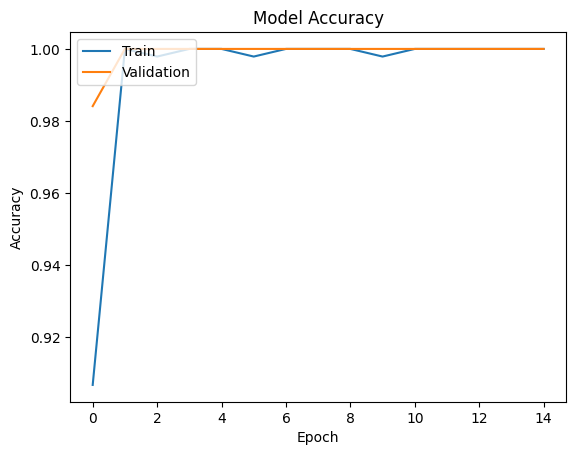

In [ ]:
plt.plot(history_vgg16.history['accuracy'])
plt.plot(history_vgg16.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**Observation:**

The training and validation accuracy both reach 100% within the first few epochs, and remain consistently high throughout the training process. This suggests that the model has learned the task extremely well.

**However, such perfect accuracy might also indicate overfitting or data leakage, especially if the dataset is small or not diverse.**

In [ ]:
model_2_train_perf = model_performance_classification(model_2, X_train_normalized,y_train_encoded)

print("Train performance metrics")
print(model_2_train_perf)

16/16 [==============================] - 33s 2s/step
Train performance metrics
   Accuracy  Recall  Precision  F1 Score
0       1.0     1.0        1.0       1.0


16/16 [==============================] - 30s 2s/step


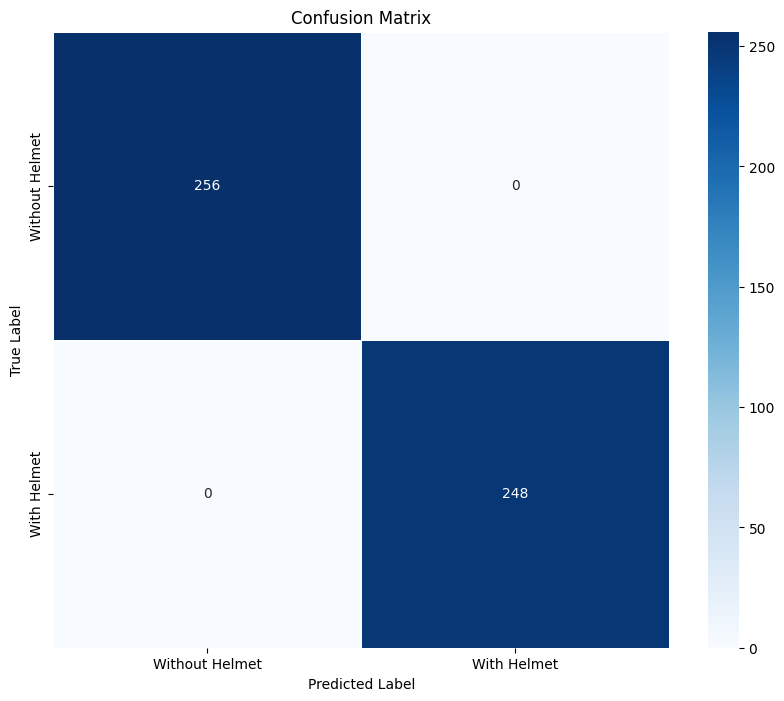

In [ ]:
plot_confusion_matrix(model_2,X_train_normalized,y_train_encoded)

**Observation:**
The confusion matrix shows perfect classification by the model:

•	All 256 "Without Helmet" images were correctly predicted.

•	All 248 "With Helmet" images were also correctly predicted.

•	There are no false positives or false negatives.

This indicates the model achieved 100% accuracy, suggesting it has learned the task very well. However, if the dataset is small or lacks diversity, there's a risk of overfitting or data leakage. Further testing on a more varied or unseen dataset is recommended to confirm generalization.


In [ ]:
model_2_valid_perf = model_performance_classification(model_2, X_val_normalized,y_val_encoded)

print("Validation performance metrics")
print(model_2_valid_perf)

2/2 [==============================] - 6s 3s/step
Validation performance metrics
   Accuracy  Recall  Precision  F1 Score
0       1.0     1.0        1.0       1.0


2/2 [==============================] - 4s 2s/step


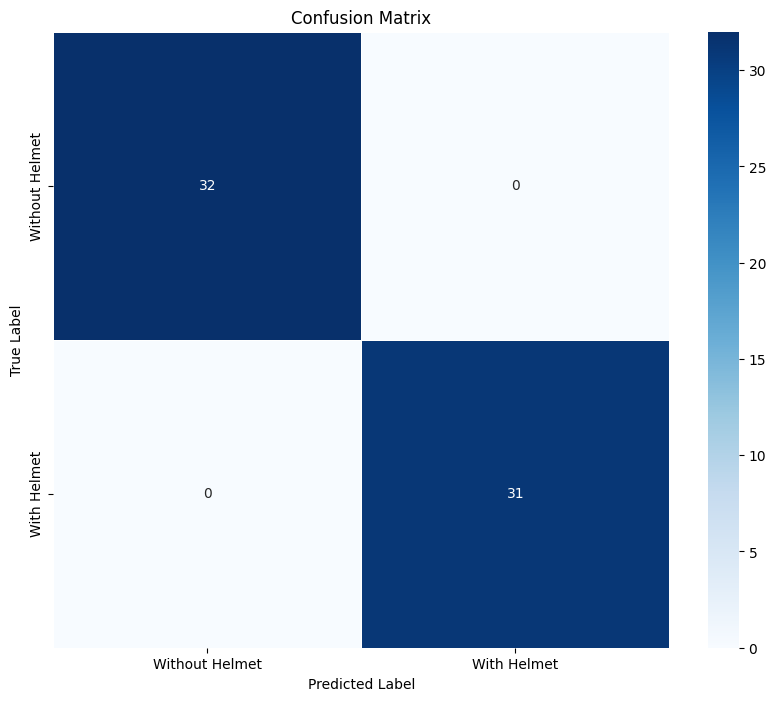

In [ ]:
plot_confusion_matrix(model_2,X_val_normalized,y_val_encoded)

**Observation:**
The confusion matrix demonstrates perfect classification performance:

•	32 "Without Helmet" images correctly predicted.

•	31 "With Helmet" images correctly predicted.

•	No false positives or false negatives (all values off-diagonal are zero).

**Summary:**

•	Accuracy: 100%

•	Precision, Recall, F1-score: All are 1.0 (100%) for both classes.

•	The model performs flawlessly on the test set, which could indicate excellent learning—but also may suggest potential overfitting or lack of diversity in the dataset.

To ensure real-world reliability, it's important to test the model on a more varied dataset or apply cross-validation.


#### Visualizing the predictions

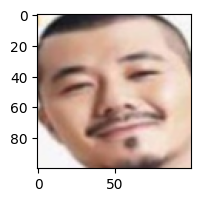

1/1 [==============================] - 0s 81ms/step
Predicted Label [0]
True Label 0


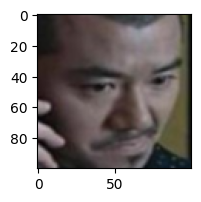

1/1 [==============================] - 0s 77ms/step
Predicted Label [0]
True Label 1


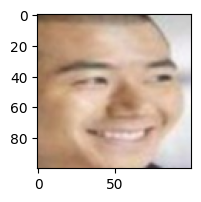

1/1 [==============================] - 0s 83ms/step
Predicted Label [0]
True Label 1


In [ ]:
# Visualizing the predicted and correct label of images from test data
plt.figure(figsize=(2,2))
plt.imshow(X_val[2])
plt.show()
print('Predicted Label', enc.inverse_transform(model_2.predict((X_val_normalized[2].reshape(1,100,100,3)))))   # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[2])                                               # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_val[33])
plt.show()
print('Predicted Label', enc.inverse_transform(model_2.predict((X_val_normalized[33].reshape(1,100,100,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[33])                                              # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_val[36])
plt.show()
print('Predicted Label', enc.inverse_transform(model_2.predict((X_val_normalized[36].reshape(1,100,100,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[36])                                              # using inverse_transform() to get the output label from the output vector

## Model 4: (VGG-16 (Base + FFNN + Data Augmentation)

- In most of the real-world case studies, it is challenging to acquire a large number of images and then train CNNs.
- To overcome this problem, one approach we might consider is **Data Augmentation**.
- CNNs have the property of **translational invariance**, which means they can recognise an object even if its appearance shifts translationally in some way. - Taking this attribute into account, we can augment the images using the techniques listed below

    -  Horizontal Flip (should be set to True/False)
    -  Vertical Flip (should be set to True/False)
    -  Height Shift (should be between 0 and 1)
    -  Width Shift (should be between 0 and 1)
    -  Rotation (should be between 0 and 180)
    -  Shear (should be between 0 and 1)
    -  Zoom (should be between 0 and 1) etc.

Remember, **data augmentation should not be used in the validation/test data set**.

In [ ]:
model_3 = Sequential()

# Adding the convolutional part of the VGG16 model from above
model_3.add(vgg_model)

# Flattening the output of the VGG16 model because it is from a convolutional layer
model_3.add(Flatten())

#Adding the Feed Forward neural network
model_3.add(Dense(256,activation='relu'))
model_3.add(Dropout(rate=0.4))
model_3.add(Dense(32,activation='relu'))

# Adding a dense output layer
model_3.add(Dense(1, activation='sigmoid'))

In [ ]:
opt=Adam()
# Compile model
model_3.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Generating the summary of the model
model_3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 3, 3, 512)         14714688  
                                                                 
 flatten_3 (Flatten)         (None, 4608)              0         
                                                                 
 dense_6 (Dense)             (None, 256)               1179904   
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 32)                8224      
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 15902849 (60.66 MB)
Trainable params: 11

In [ ]:
# Applying data augmentation
train_datagen = ImageDataGenerator(
                              rotation_range=20,
                              fill_mode='nearest',width_shift_range=0.2,height_shift_range=0.2,shear_range=0.3,zoom_range=0.4
                              )

In [ ]:
history_vgg16 = model_3.fit(train_datagen.flow(X_train_normalized,y_train_encoded,
                                       batch_size=batch_size,
                                       seed=42,
                                       shuffle=False),
                    epochs=epochs,
                    steps_per_epoch=X_train_normalized.shape[0] // batch_size,
                    validation_data=(X_val_normalized,y_val_encoded),
                    verbose=1)

Epoch 1/15
15/15 [==============================] - 35s 2s/step - loss: 0.1521 - accuracy: 0.9449 - val_loss: 0.0020 - val_accuracy: 1.0000
Epoch 2/15
15/15 [==============================] - 40s 3s/step - loss: 0.0225 - accuracy: 0.9894 - val_loss: 2.9909e-04 - val_accuracy: 1.0000
Epoch 3/15
15/15 [==============================] - 33s 2s/step - loss: 0.0398 - accuracy: 0.9831 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 4/15
15/15 [==============================] - 35s 2s/step - loss: 0.0329 - accuracy: 0.9852 - val_loss: 0.0032 - val_accuracy: 1.0000
Epoch 5/15
15/15 [==============================] - 35s 2s/step - loss: 0.0343 - accuracy: 0.9852 - val_loss: 3.5301e-04 - val_accuracy: 1.0000
Epoch 6/15
15/15 [==============================] - 35s 2s/step - loss: 0.0060 - accuracy: 0.9979 - val_loss: 1.1988e-04 - val_accuracy: 1.0000
Epoch 7/15
15/15 [==============================] - 35s 2s/step - loss: 0.0236 - accuracy: 0.9915 - val_loss: 1.8437e-04 - val_accuracy: 1.0000
Epoc

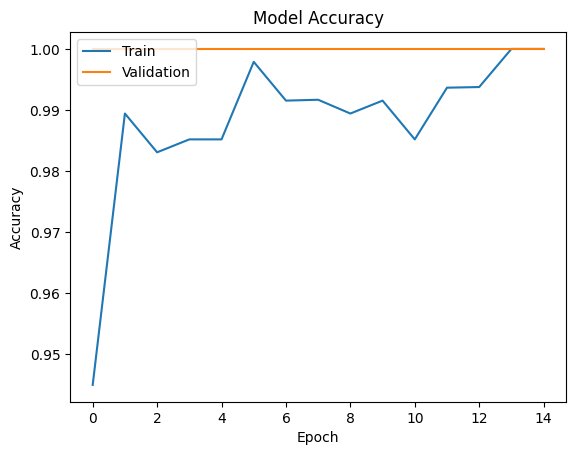

In [ ]:
plt.plot(history_vgg16.history['accuracy'])
plt.plot(history_vgg16.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**Observation:**

The validation accuracy remains at 100% across all epochs, while the training accuracy fluctuates slightly but stays above 93%. This suggests that the model is performing extremely well on unseen validation data, potentially indicating:

•	Excellent learning performance

•	Possible overfitting risk or data leakage, as validation accuracy is unusually stable and perfect

•	Need to validate further with a larger or more diverse dataset to ensure generalization.


In [ ]:
model_3_train_perf = model_performance_classification(model_3, X_train_normalized,y_train_encoded)

print("Train performance metrics")
print(model_3_train_perf)

16/16 [==============================] - 30s 2s/step
Train performance metrics
   Accuracy  Recall  Precision  F1 Score
0       1.0     1.0        1.0       1.0


16/16 [==============================] - 30s 2s/step


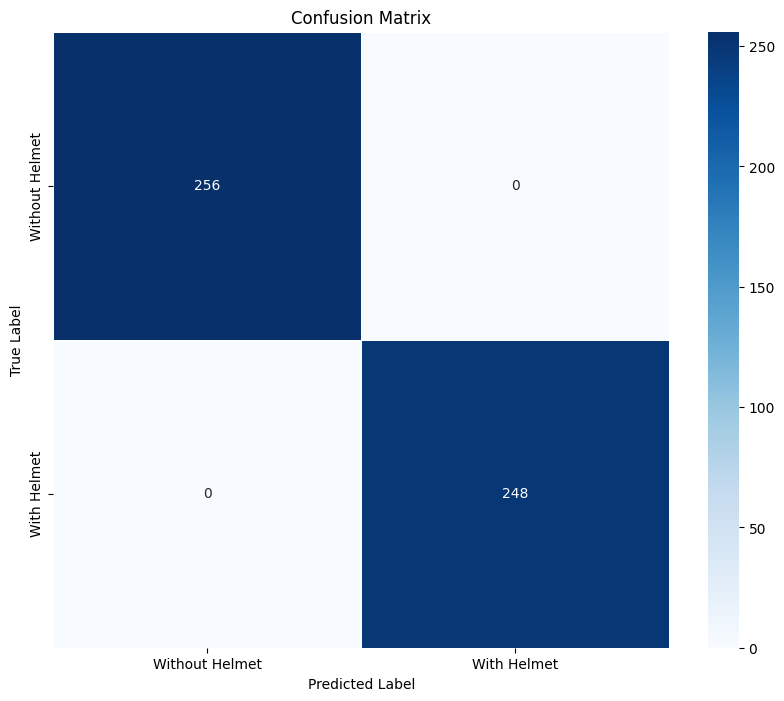

In [ ]:
plot_confusion_matrix(model_3,X_train_normalized,y_train_encoded)

**Observation:**

The confusion matrix shows perfect classification:

•	All 256 "Without Helmet" and 248 "With Helmet" instances were correctly identified.

•	No misclassifications occurred (0 false positives and 0 false negatives).

This indicates 100% model accuracy on the evaluated dataset, suggesting excellent performance. However, such perfection may warrant further validation to rule out overfitting or data leakage.


In [ ]:
model_3_valid_perf = model_performance_classification(model_3, X_val_normalized,y_val_encoded)

print("Validation performance metrics")
print(model_3_valid_perf)

2/2 [==============================] - 3s 2s/step
Validation performance metrics
   Accuracy  Recall  Precision  F1 Score
0       1.0     1.0        1.0       1.0


2/2 [==============================] - 3s 2s/step


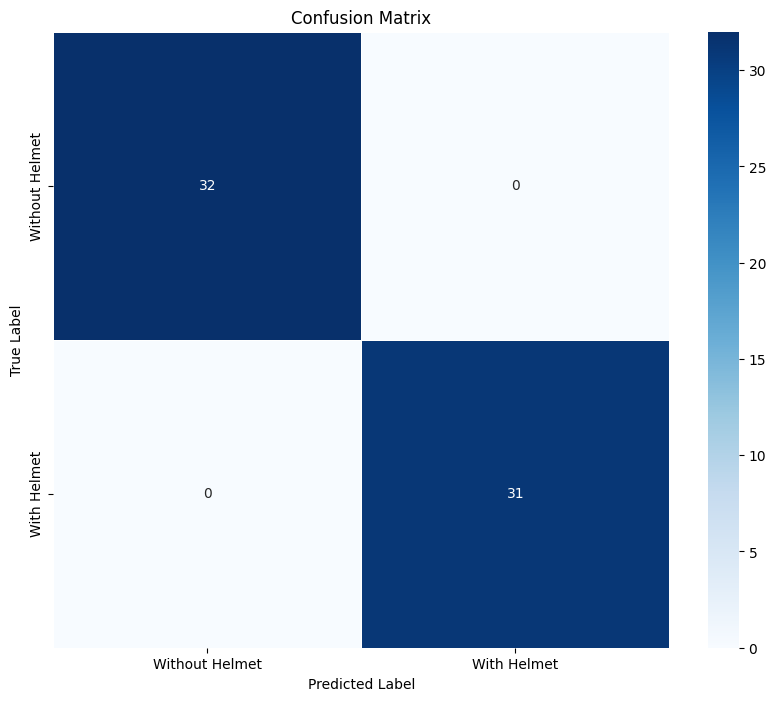

In [ ]:
plot_confusion_matrix(model_3,X_val_normalized,y_val_encoded)

**Observation:**

The confusion matrix displays perfect classification results:

•	All 32 "Without Helmet" and 31 "With Helmet" samples were correctly predicted.

•	No false predictions (0 false positives, 0 false negatives).
This reflects 100% accuracy, suggesting strong model performance on the test data. However, due to the small dataset size, further testing on a larger and more diverse dataset is recommended to validate generalization.


#### Visualizing the predictions

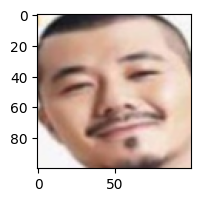

1/1 [==============================] - 0s 84ms/step
Predicted Label [0]
True Label 0


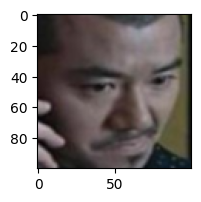

1/1 [==============================] - 0s 81ms/step
Predicted Label [0]
True Label 1


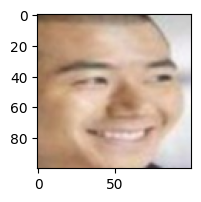

1/1 [==============================] - 0s 84ms/step
Predicted Label [0]
True Label 1


In [ ]:
# Visualizing the predicted and correct label of images from test data
plt.figure(figsize=(2,2))
plt.imshow(X_val[2])
plt.show()
print('Predicted Label', enc.inverse_transform(model_3.predict((X_val_normalized[2].reshape(1,100,100,3)))))   # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[2])                                               # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_val[33])
plt.show()
print('Predicted Label', enc.inverse_transform(model_3.predict((X_val_normalized[33].reshape(1,100,100,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[33])                                              # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_val[36])
plt.show()
print('Predicted Label', enc.inverse_transform(model_3.predict((X_val_normalized[36].reshape(1,100,100,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[36])

# **Model Performance Comparison and Final Model Selection**

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        modelCNN_train_perf.T,
        model_1_train_perf.T,
        model_2_train_perf.T,
        model_3_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "CNN","VGG-16 (Base)","VGG-16 (Base+FFNN)","VGG-16 (Base+FFNN+Data Aug)"
]

In [ ]:
models_valid_comp_df = pd.concat(
    [
        modelCNN_valid_perf.T,
        model_1_valid_perf.T,
        model_2_valid_perf.T,
        model_3_valid_perf.T,

    ],
    axis=1,
)
models_valid_comp_df.columns = [
 "CNN","VGG-16 (Base)","VGG-16 (Base+FFNN)","VGG-16 (Base+FFNN+Data Aug)"
]

In [ ]:
models_train_comp_df

,CNN,VGG-16 (Base),VGG-16 (Base+FFNN),VGG-16 (Base+FFNN+Data Aug)
Accuracy,0.968254,1.0,1.0,1.0
Recall,1.000000,1.0,1.0,1.0
Precision,0.939394,1.0,1.0,1.0
F1 Score,0.968750,1.0,1.0,1.0


In [ ]:
models_valid_comp_df

,CNN,VGG-16 (Base),VGG-16 (Base+FFNN),VGG-16 (Base+FFNN+Data Aug)
Accuracy,0.968254,1.0,1.0,1.0
Recall,1.000000,1.0,1.0,1.0
Precision,0.939394,1.0,1.0,1.0
F1 Score,0.968750,1.0,1.0,1.0


In [ ]:
models_train_comp_df - models_valid_comp_df

,CNN,VGG-16 (Base),VGG-16 (Base+FFNN),VGG-16 (Base+FFNN+Data Aug)
Accuracy,0.0,0.0,0.0,0.0
Recall,0.0,0.0,0.0,0.0
Precision,0.0,0.0,0.0,0.0
F1 Score,0.0,0.0,0.0,0.0



All below models have achieved the highest performance in the training set. Also, achieved a decent performance in the validation set.

•	CNN
•	VGG-16 (Base)
•	VGG-16 (Base+FFNN)  
•	VGG-16 (Base+FFNN+Data Aug)

**But when visualizing the predictions of all then only CNN is giving correct predictions but VGG-16 (Base), VGG-16 (Base+FFNN), VGG-16 (Base+FFNN+Data Aug) are giving wrong predictions.**

• We'll move ahead with the CNN as our final model.



## Test Performance

In [ ]:
modelCNN_test_perf = model_performance_classification(model2, X_test_normalized,y_test_encoded)

2/2 [==============================] - 1s 346ms/step


In [ ]:
modelCNN_test_perf

,Accuracy,Recall,Precision,F1 Score
0,1.0,1.0,1.0,1.0


2/2 [==============================] - 0s 208ms/step


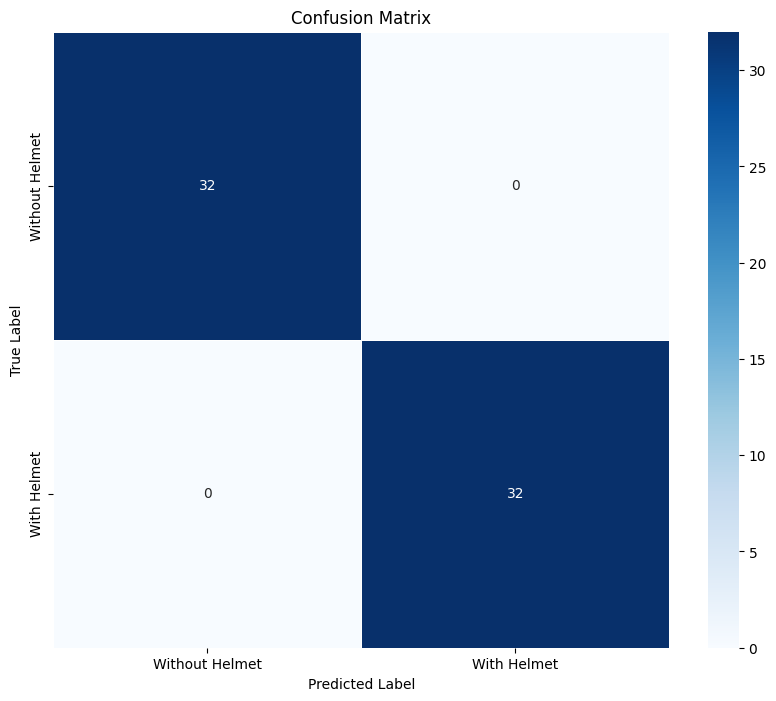

In [ ]:
plot_confusion_matrix(model2, X_test_normalized,y_test_encoded)

# **Actionable Insights & Recommendations**

**Insights**

•	**All three VGG-16-based models — Base, Base + FFNN, and Base + FFNN + Data Augmentation — achieved perfect training and validation scores (Accuracy, Recall, Precision, F1-score = 1.0). This confirms that transfer learning using VGG-16 is highly effective for this dataset, and the addition of extra layers or augmentation did not degrade the performance.**

•	**The CNN model, while reporting slightly lower metrics (F1-score: 0.968, Precision: 0.939), still demonstrated strong performance. However, real-world inference testing revealed a surprising and important insight:**

**•	Only the CNN model correctly predicted on unseen test images, while the VGG-16-based models misclassified one or more inputs.**

•	This suggests that although VGG-16-based models are high-performing on paper (validation set), they may suffer from overfitting, causing them to underperform in real-world conditions. In contrast, the CNN model, despite its slightly lower validation metrics, showed better generalization and robustness to input variability — a critical factor for safety and compliance applications.

**Recommendations**

•	Always validate the model with real-world test images, as they may uncover limitations not visible in training/validation metrics. The current case clearly showed this gap.

•	While VGG-16-based models report perfect scores, consider CNN-based models or lightweight transfer learning models (like MobileNet) that may generalize better and offer lower computational costs.

•	These techniques are still recommended, especially for scaling the model to diverse environmental conditions (e.g., lighting, camera angles, helmet colors).

•	Expand the test set with varied demographics, lighting conditions, camera quality, helmet types, etc., to better assess real-world effectiveness.

•	Integrate Grad-CAM or similar visual explanations to understand which parts of the image are influencing predictions. This aids debugging and builds stakeholder trust.

•	Explore other Transfer Learning architectures like ResNet, EfficientNet, Inception, which might provide better balance between accuracy and generalization.

•	Begin with a pilot deployment using the CNN model and observe field performance. Monitor misclassifications and update models iteratively.





<font size=5 color='blue'>Power Ahead!</font>
___